| Problem | Formula|Search Domain|
|---      |----    |----|
|ZDT1|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g} \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT2|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-(f1/g)^2 \\\end{cases}} \text{  where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT3|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g}-(f_1/g)sin(10\pi f_1) \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|

# ZDT1 problem 
## - (#variables / #objectives)
## - 10/2
## - 20/2

 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [11]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = get_performance_indicator("igd+", pf)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',
    'exec_time', 'hv','igd_plus',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['igd_plus','hv'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)


In [12]:


pd.set_option('display.max_rows', None)

filename = 'result_5NOV'
folder = os.path.dirname(os.getcwd())
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
result = result.loc[result['Problem']=='ZDT1'].reset_index(drop=True)
zdt1_10= result.loc[result['n_variables']==10].reset_index(drop=True)
zdt1_20= result.loc[result['n_variables']==20].reset_index(drop=True)
print(f"The number of records {len(zdt1_10)}")
print(f"The number of records {len(zdt1_20)}")

The number of records 56
The number of records 56


In [13]:
#path and image path indicating location of objective file and visualization file
zdt1_10.iloc[:,-2:].head(5)

,path,image_location
0,ZDT1/NSGA2_ZDT1_10/ZDT1_NSGA2_Iteration-100_Ob...,Images/ZDT1/NSGA2_ZDT1Var-10/ZDT1_NSGA2_Iterat...
1,ZDT1/NSGA2_ZDT1_10/ZDT1_NSGA2_Iteration-100_Ob...,Images/ZDT1/NSGA2_ZDT1Var-10/ZDT1_NSGA2_Iterat...
2,ZDT1/NSGA2_ZDT1_10/ZDT1_NSGA2_Iteration-100_Ob...,Images/ZDT1/NSGA2_ZDT1Var-10/ZDT1_NSGA2_Iterat...
3,ZDT1/NSGA2_ZDT1_10/ZDT1_NSGA2_Iteration-1000_O...,Images/ZDT1/NSGA2_ZDT1Var-10/ZDT1_NSGA2_Iterat...
4,ZDT1/NSGA2_ZDT1_10/ZDT1_NSGA2_Iteration-500_Ob...,Images/ZDT1/NSGA2_ZDT1Var-10/ZDT1_NSGA2_Iterat...


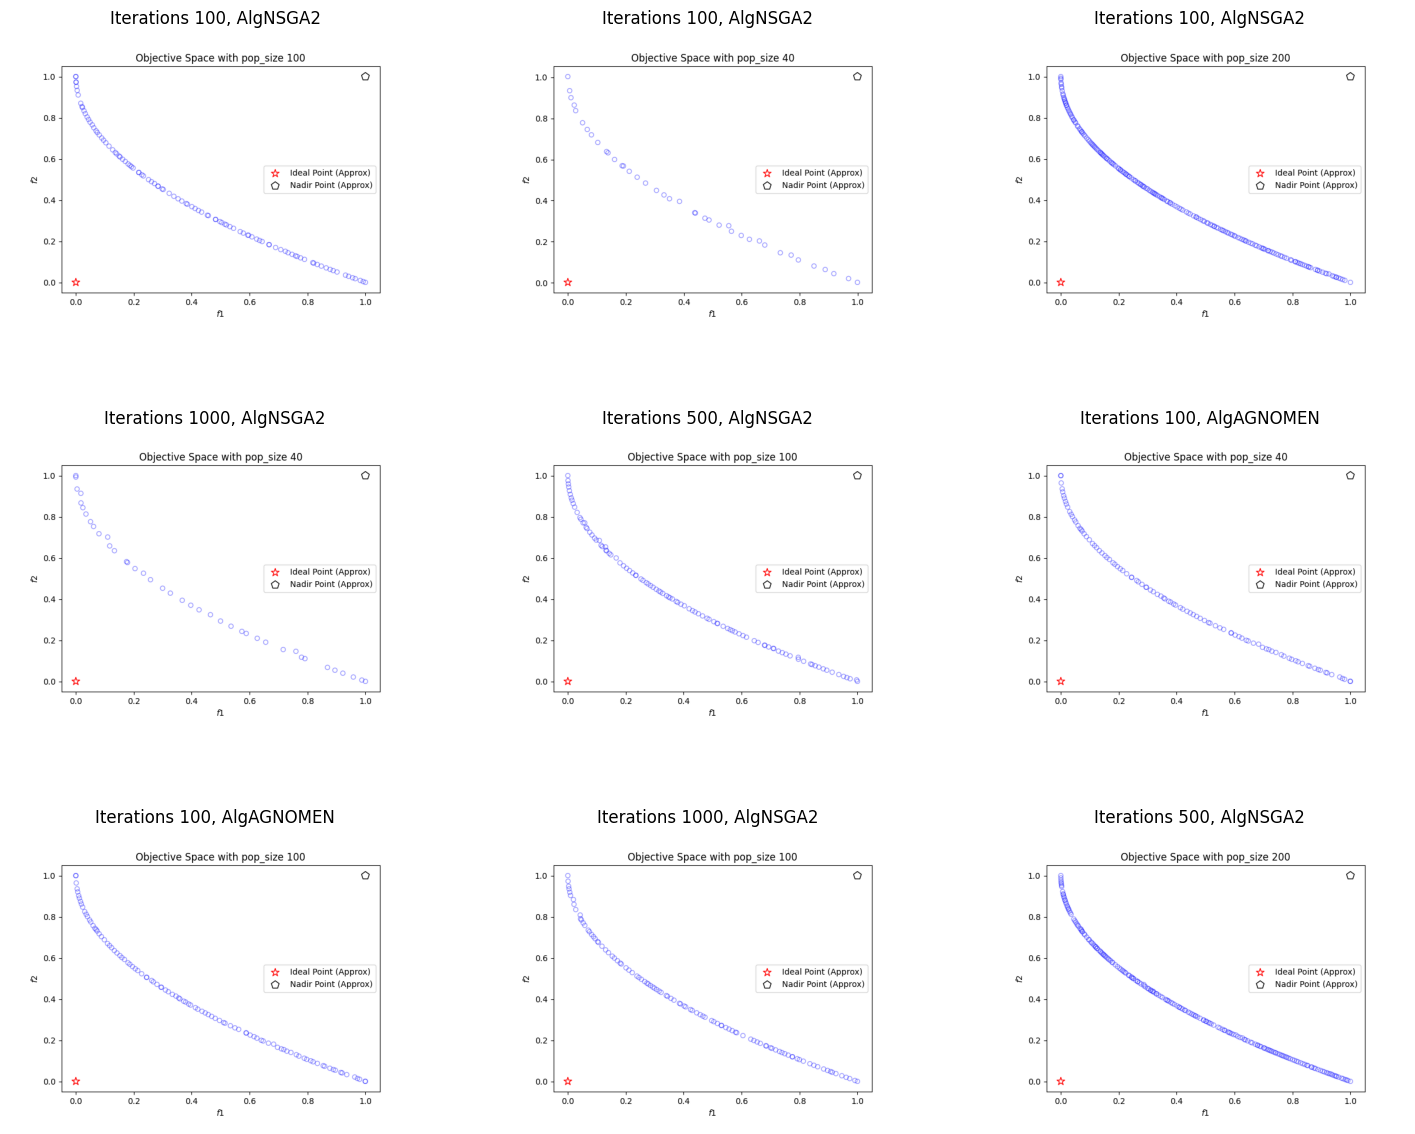

In [14]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt1_10['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {zdt1_10.Iteration[i]}, Alg{zdt1_10.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [15]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(zdt1_10['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([1. ,1.27])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt1_10_pf' ))
hv_result(zdt1_10)

Global nadir point for kur1 with two variables is :[1.   1.27]
ref_point is [1.   1.27]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT1,NSGA3,20000,500,2,10,40,2.6047568,0.8639896,0.0385648,0.0011032
1,ZDT1,NSGA3,4000,100,2,10,40,0.4995661,0.8858943,0.0308538,0.0012650
2,ZDT1,NSGA3,8000,200,2,10,40,1.0203536,0.8982814,0.0225558,0.0013802
3,ZDT1,RNSGA2,4000,100,2,10,40,0.7990372,0.8993004,0.0182064,0.0017700
4,ZDT1,RNSGA2,8000,200,2,10,40,1.6570957,0.9015121,0.0175516,0.0008976
5,ZDT1,NSGA3,40000,1000,2,10,40,5.9279442,0.9037947,0.0175440,0.0008180
6,ZDT1,RNSGA2,40000,1000,2,10,40,8.5283222,0.9074554,0.0158442,0.0009360
7,ZDT1,RNSGA2,20000,500,2,10,40,4.3747942,0.9081130,0.0147457,0.0009060
8,ZDT1,NSGA3,10000,100,2,10,100,0.9930081,0.9200559,0.0088525,0.0039732
9,ZDT1,NSGA2,4000,100,2,10,40,0.4545455,0.9178670,0.0086551,0.0007939


In [16]:
ref_point = np.array([5 ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt1_10_pf' ))
hv_result(zdt1_10)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT1,NSGA3,20000,500,2,10,40,2.6047568,24.1000108,0.0385648,0.0009749
1,ZDT1,NSGA3,4000,100,2,10,40,0.4995661,23.9727835,0.0308538,0.0009549
2,ZDT1,NSGA3,8000,200,2,10,40,1.0203536,23.9894198,0.0225558,0.0007973
3,ZDT1,RNSGA2,4000,100,2,10,40,0.7990372,24.5898312,0.0182064,0.0007210
4,ZDT1,RNSGA2,8000,200,2,10,40,1.6570957,24.6023991,0.0175516,0.0007181
5,ZDT1,NSGA3,40000,1000,2,10,40,5.9279442,24.1724124,0.0175440,0.0008452
6,ZDT1,RNSGA2,40000,1000,2,10,40,8.5283222,24.6162789,0.0158442,0.0009670
7,ZDT1,RNSGA2,20000,500,2,10,40,4.3747942,24.5985891,0.0147457,0.0014958
8,ZDT1,NSGA3,10000,100,2,10,100,0.9930081,24.3069941,0.0088525,0.0018120
9,ZDT1,NSGA2,4000,100,2,10,40,0.4545455,24.6391064,0.0086551,0.0006850


# zdt1 with 20 variables

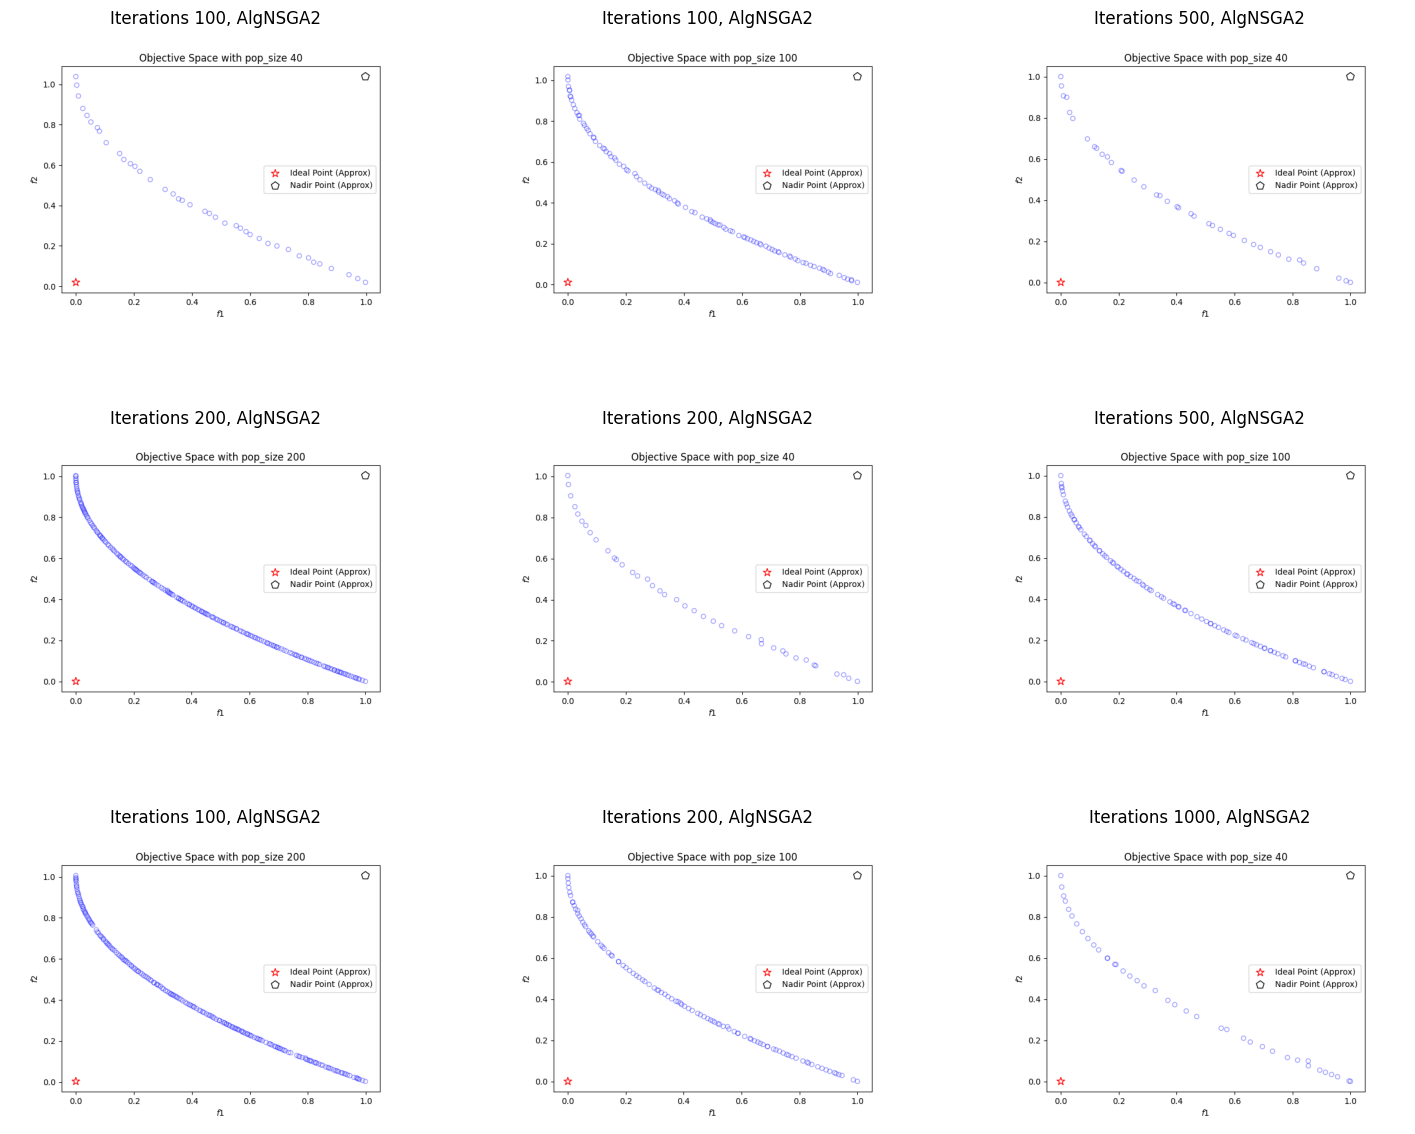

In [17]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt1_20['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {zdt1_20.Iteration[i]}, Alg{zdt1_20.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [18]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(zdt1_20['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([1  ,1.04])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt1_20_pf' ))
hv_result(zdt1_20)

Global nadir point for kur1 with two variables is :[1.   1.04]
ref_point is [1.   1.04]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT1,NSGA3,20000,500,2,20,40,2.6050634,0.6497712,0.0365356,0.0009720
1,ZDT1,RNSGA2,4000,100,2,20,40,0.7884374,0.6542504,0.0279626,0.0008001
2,ZDT1,NSGA3,4000,100,2,20,40,0.4979494,0.6572840,0.0257854,0.0009491
3,ZDT1,NSGA2,4000,100,2,20,40,0.4715416,0.6591174,0.0252043,0.0008373
4,ZDT1,NSGA3,8000,200,2,20,40,1.0406010,0.6562520,0.0246491,0.0010710
5,ZDT1,RNSGA2,8000,200,2,20,40,2.0692711,0.6697458,0.0188313,0.0008690
6,ZDT1,RNSGA2,20000,500,2,20,40,4.3215027,0.6741733,0.0160901,0.0008559
7,ZDT1,NSGA3,40000,1000,2,20,40,5.4561214,0.6780535,0.0142160,0.0010397
8,ZDT1,RNSGA2,40000,1000,2,20,40,9.0552192,0.6806329,0.0125642,0.0008910
9,ZDT1,RNSGA2,10000,100,2,20,100,1.9070861,0.6864180,0.0102965,0.0024810


In [19]:
ref_point = np.array([5  ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt2_10_pf' ))
hv_result(zdt1_20)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT1,NSGA3,20000,500,2,20,40,2.6050634,23.7874379,0.0185997,0.0007241
1,ZDT1,NSGA3,8000,200,2,20,40,1.0406010,24.2637278,0.0024969,0.0009682
2,ZDT1,NSGA3,20000,200,2,20,100,2.2030101,24.4610875,0.0010416,0.0018039
3,ZDT1,NSGA3,4000,100,2,20,40,0.4979494,24.4284065,0.0009616,0.0007920
4,ZDT1,NSGA3,40000,1000,2,20,40,5.4561214,24.4442370,0.0009337,0.0006938
5,ZDT1,NSGA3,10000,100,2,20,100,0.9933138,24.4633052,0.0009176,0.0016859
6,ZDT1,NSGA3,50000,500,2,20,100,5.5486248,24.4886018,0.0006017,0.0019579
7,ZDT1,RNSGA2,4000,100,2,20,40,0.7884374,24.4846207,0.0004960,0.0006721
8,ZDT1,NSGA2,4000,100,2,20,40,0.4715416,24.5419463,0.0003468,0.0008337
9,ZDT1,NSGA3,10000000,100000,2,20,100,1151.9095571,24.5707516,0.0002462,0.0016911
